In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string

In [2]:
data= pd.read_excel("train_BDC.xlsx")

In [3]:
data.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,2020-08-17 00:00:00,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,2020-07-17 00:00:00,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,2020-07-13 00:00:00,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,2020-07-08 00:00:00,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,2020-06-24 00:00:00,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [4]:
data.info()#gaada missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                4231 non-null   int64 
 1   label             4231 non-null   int64 
 2   tanggal           4231 non-null   object
 3   judul             4231 non-null   object
 4   narasi            4231 non-null   object
 5   nama file gambar  4231 non-null   object
dtypes: int64(2), object(4)
memory usage: 198.5+ KB


In [5]:
data.isna().sum()#validasi missing value

ID                  0
label               0
tanggal             0
judul               0
narasi              0
nama file gambar    0
dtype: int64

In [6]:
cat = ['judul','narasi']
num = ['label']

In [7]:
for col in cat:
    print(f'''Value count kolom {col}:     ''')
    print(data[col].value_counts())
    print()

Value count kolom judul:     
Ketua KPU Imbau Masyarakat Hormati Hasil Pemilu Walau Banyak Kecurangan      2
Didit Prabowo akan menikahkan para gay                                       2
Mengenai Pemerintah Cabut Sertifikasi Halal Dari MUI                         2
: Zulkifli Hasan Sebut 5 Fraksi di DPR Dukung LGBT                           2
Jokowi Dikatakan Seperti Anak Kecil dan Bodoh oleh Media Luar                2
                                                                            ..
Akun Whatsapp Kepala Dinkes Kota Bengkulu Meminta Transfer Uang              1
My Roti Kloning Sari Roti                                                    1
Satgas Pangan Polri Pastikan Tak Ada Telur Palsu Beredar di Pasar            1
Bila nampak dalam perut ikan sejenis telur ikan seperti dlm gambar ini...    1
MENGETAHUI KANDUNGAN PASTA GIGI DARI KODE WARNA                              1
Name: judul, Length: 4219, dtype: int64

Value count kolom narasi:     
Cek tangkapan layar.         

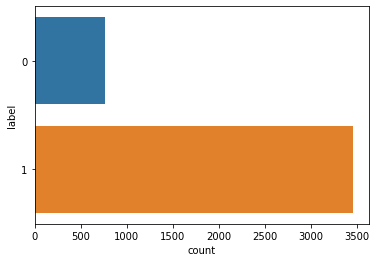

In [8]:
sns.countplot(y='label', data=data); #lebih banyak hoax news(imbalance data target)

In [9]:
data['judul'].unique()

array(['Pemakaian Masker Menyebabkan Penyakit Legionnaires',
       'Instruksi Gubernur Jateng tentang penilangan  bagi yg tidak bermasker di muka umum Rp.150.000 menggunakan e-tilang Via apps PIKOBAR',
       'Foto Jim Rohn: Jokowi adalah presiden terbaik dlm sejarah bangsa Indonesia',
       ...,
       'Gambar Denny Siregar Musuh Warga Tasikmalaya di Belakang Truk',
       'Kaesang: Bapak Saya dengan Kesederhaan Bisa Nipu Rakyat Indonesia Kenapa Saya Tidak?',
       'Laser dari termometer gun akan merusak struktur otak'],
      dtype=object)

In [10]:
data['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [11]:
#data cleaning
import re
def clean_train_data(x):
    teks = x
    teks = teks.lower()
    teks = re.sub('\[.*?\]', '', teks) # remove square brackets
    teks = re.sub(r'[^\w\s]','',teks) # remove punctuation
    teks = re.sub('\w*\d\w*', '', teks) # remove words containing numbers
    teks = re.sub(r'http\S+', '', teks)
    teks = re.sub('\n', '', teks)
    return teks

In [12]:
clean_combine_data = data.copy()
clean_combine_data['narasi'] = data.narasi.apply(lambda x : clean_train_data(x))
clean_combine_data.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,2020-08-17 00:00:00,Pemakaian Masker Menyebabkan Penyakit Legionna...,a caller to a radio talk show recently shared ...,71.jpg
1,461,1,2020-07-17 00:00:00,Instruksi Gubernur Jateng tentang penilangan ...,ythseluruh anggota grup sesuai instruksi guber...,461.png
2,495,1,2020-07-13 00:00:00,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,2020-07-08 00:00:00,"ini bukan politik, tapi kenyataan Pak Jokowi b...",maaf dan ini bukan politik tapi kenyataan pa...,550.png
4,681,1,2020-06-24 00:00:00,Foto Kadrun kalo lihat foto ini panas dingin,kadrun kalo lihat foto ini panas dingin,681.jpg


In [13]:
clean_combine_data.tail()

,ID,label,tanggal,judul,narasi,nama file gambar
4226,999287,1,2016-01-17 00:00:00,: KPK Dilarang Membawa Brimob Bersenjata Masuk...,kpk dilarang membawa brimob bersenjata masuk g...,999287.jpg
4227,999472,1,2020-08-20 00:00:00,Foto pejabat keuangan dibawah palu arit,jangan mau dialihkan kepada pakaian adat fokus...,999472.png
4228,999501,1,2020-08-17 00:00:00,Gambar Denny Siregar Musuh Warga Tasikmalaya d...,akhir nya bisa terkenal bang denny,999501.jpg
4229,999848,1,2020-07-21 00:00:00,Kaesang: Bapak Saya dengan Kesederhaan Bisa Ni...,bapak saya dengan kesederhaan bisa nipu rakyat...,999848.jpg
4230,999860,1,2020-07-20 00:00:00,Laser dari termometer gun akan merusak struktu...,in saya nolak kalau anda mau periksa bukan per...,999860.png


In [14]:
nltk.download('stopwords')
ind_stopwords = nltk.corpus.stopwords.words("indonesian")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
def remove_ind_stopwords(narasi):
    token_text = nltk.word_tokenize(narasi)
    remove_stop = [word for word in token_text if word not in ind_stopwords]
    join_text = ' '.join(remove_stop)
    return join_text

In [16]:
nltk.download('punkt')
stopword_combine_data = clean_combine_data.copy()
stopword_combine_data['narasi'] = data.narasi.apply(lambda x : remove_ind_stopwords(x))
stopword_combine_data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,2020-08-17 00:00:00,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,2020-07-17 00:00:00,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,2020-07-13 00:00:00,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi presiden terbaik dlm sejarah bangsa Ind...,495.png
3,550,1,2020-07-08 00:00:00,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 Mbak2 , politik , kenyataan Pak Joko...",550.png
4,681,1,2020-06-24 00:00:00,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto panas dingin . .,681.jpg


In [17]:
from itertools import chain
from collections import Counter

list_words = stopword_combine_data['narasi'].str.split()
list_words_merge = list(chain(*list_words))

d = Counter(list_words_merge)
df = pd.DataFrame(data=d, index=['count'])
top_common_words = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
top_common_words.head()

,index,count
0,",",5040
1,.,4458
2,!,1119
3,?,855
4,(,713


In [18]:
top_common_words

,index,count
0,",",5040
1,.,4458
2,!,1119
3,?,855
4,(,713
5,),710
6,”,693
7,:,669
8,yg,667
9,“,563


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

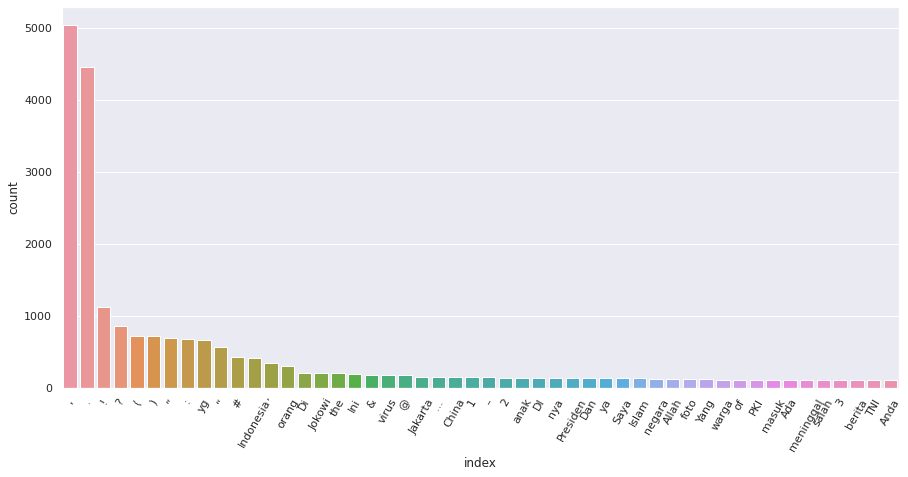

In [19]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=top_common_words)
plt.xticks(rotation=60)

In [20]:
#lemmatizion

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [21]:
nltk.download('wordnet')
lemm = WordNetLemmatizer()

def word_lemmatizer(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [lemm.lemmatize(w) for w in token_text]
    join_text = ' '.join(remove_stop)
    return join_text

lemmatize_data = stopword_combine_data.copy()
lemmatize_data['narasi'] = data.narasi.apply(lambda x : word_lemmatizer(x))
lemmatize_data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,2020-08-17 00:00:00,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,2020-07-17 00:00:00,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,2020-07-13 00:00:00,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,2020-07-08 00:00:00,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2 , ini bukan politik , tapi...",550.png
4,681,1,2020-06-24 00:00:00,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [22]:
string = ' '.join(lemmatize_data['narasi'])
str_val = string.split(" ")

In [23]:


#unigram analysis
data_unigram=(pd.Series(nltk.ngrams(str_val, 1)).value_counts())[:30]

data_unigram_df=pd.DataFrame(data_unigram)
data_unigram_df = data_unigram_df.reset_index()
data_unigram_df = data_unigram_df.rename(columns={"index": "key", 0: "value"})
data_unigram_df.head()




,key,value
0,"(,,)",5040
1,"(.,)",4458
2,"(di,)",2279
3,"(yang,)",1589
4,"(dan,)",1587


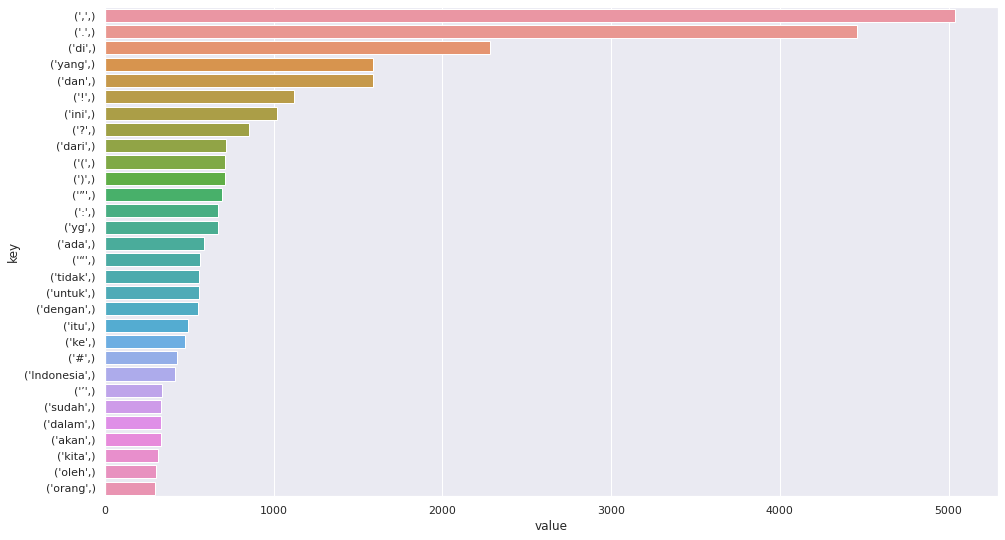

In [24]:
#unigram
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_unigram_df)

In [25]:
#modelling
model_data = lemmatize_data.copy()


model_data['combine_text'] =   model_data['narasi']

del model_data['judul']
del model_data['tanggal']
del model_data['narasi']
del model_data['nama file gambar']
model_data.head()

,ID,label,combine_text
0,71,1,A caller to a radio talk show recently shared ...
1,461,1,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...
2,495,1,Jokowi adalah presiden terbaik dlm sejarah ban...
3,550,1,"Maaf Mas2 dan Mbak2 , ini bukan politik , tapi..."
4,681,1,Kadrun kalo lihat foto ini panas dingin . .


In [26]:
hoax = model_data.query('label==1')
rill = model_data.query('label==0')

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [28]:
data_vec = vectorizer.fit_transform(model_data['combine_text'])
data_vec

<4231x18609 sparse matrix of type '<class 'numpy.int64'>'
	with 95765 stored elements in Compressed Sparse Row format>

In [29]:
print(model_data['combine_text'][1])#mau liat data urut 2

Yth.Seluruh Anggota Grup Sesuai Instruksi Gubernur Jawa Tengah Hasil Rapat Tim Gugus Tugas Covid 19 Jateng sbb :


In [30]:
ekstraksi_kata = vectorizer.get_feature_names()#liat hasil combinetext yg di vetorisasi

In [31]:
random = model_data.sample(frac=1)#random sample

In [32]:
train = random[:3385]#pembagian data train 80% dan test 20%
test = random[846:]

In [33]:
train1 = vectorizer.fit_transform(train['combine_text'])#training pada data train
train1

<3385x16288 sparse matrix of type '<class 'numpy.int64'>'
	with 76301 stored elements in Compressed Sparse Row format>

In [34]:
test1 = vectorizer.transform(test['combine_text'])#training pada data test
test1

<3385x16288 sparse matrix of type '<class 'numpy.int64'>'
	with 73956 stored elements in Compressed Sparse Row format>

In [35]:
train_label = train['label']#ambil label hoax atau rill
test_label = test['label']

In [36]:
from sklearn.ensemble import RandomForestClassifier #klasifikasi use randomforest
random_forest = RandomForestClassifier(n_estimators=150)

In [37]:
random_forest.fit(train1, train_label) #lakukan traing randomforest yang sudah ditransform

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
print("test skore:",random_forest.score(test1, test_label))
print("train skor:",random_forest.score(train1, train_label))#skor terbaik untuk 3 model yang dicoba

test skore: 0.9530280649926145
train skor: 0.9988183161004431


In [53]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(train1, train_label)
print("test skor:",NB.score(test1, test_label))
print("train skor:",NB.score(train1, train_label))

test skor: 0.9036927621861152
train skor: 0.9364844903988183


In [54]:
from xgboost import XGBClassifier
classifier1 = XGBClassifier()
classifier1.fit(train1, train_label)
print("test skor:",classifier1.score(test1, test_label))
print("train skor:",classifier1.score(train1, train_label))

test skor: 0.8378138847858198
train skor: 0.8413589364844904


TEST TERHADAP DATA TESTING

In [56]:
model_data['label'] = model_data.apply(lambda _: '', axis=1)#menambahkan kolom label

In [57]:
model_data.head()
#hanya melanjutkan dari data testing

,ID,label,combine_text
0,71,,A caller to a radio talk show recently shared ...
1,461,,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...
2,495,,Jokowi adalah presiden terbaik dlm sejarah ban...
3,550,,"Maaf Mas2 dan Mbak2 , ini bukan politik , tapi..."
4,681,,Kadrun kalo lihat foto ini panas dingin . .
